In [127]:
import astropy.io.fits as fits
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from astropy.visualization import simple_norm
import ccdproc as ccd
from astropy import visualization as viz
from astropy.visualization import (imshow_norm, MinMaxInterval, SqrtStretch, ZScaleInterval)
from astropy.coordinates import SkyCoord
from photutils.aperture import ApertureStats
from astropy.stats import SigmaClip
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
from astropy.wcs import WCS
from astropy.table import Table
from astropy.io import ascii
from astropy import units as u
from datetime import datetime
from astropy.time import Time
from astropy.modeling import models, fitting
from scipy.optimize import curve_fit

# Data Reduction

### Files

In [4]:
directory = '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/*'
glob(directory)

['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/bias',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/calibration',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/dark',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/deneb',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/epsPeg',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/europa',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/flat',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/sun',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/vega']

In [250]:
directory2 = '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/*'
glob(directory2)

['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/bias',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/calibration',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/dark',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/flat',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/sky',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/vega']

In [13]:
files_bias = glob(glob(directory)[1]+'/*')
files_dark = glob(glob(directory)[3]+'/*')
files_flat = glob(glob(directory)[7]+'/*')
files_cali = glob(glob(directory)[2]+'/*')
files_albr = glob(glob(directory)[0]+'/*')
files_denb = glob(glob(directory)[4]+'/*')
files_epsP = glob(glob(directory)[5]+'/*')
files_euro = glob(glob(directory)[6]+'/*')
files_jupi = glob(glob(directory)[8]+'/*')
files_sunn = glob(glob(directory)[9]+'/*')
files_vega = glob(glob(directory)[10]+'/*')

In [256]:
files_bias2 = glob(glob(directory2)[0]+'/*')
files_dark2 = glob(glob(directory2)[2]+'/*')
files_flat2 = glob(glob(directory2)[3]+'/*')
files_cali2 = glob(glob(directory2)[1]+'/*')

In [26]:
ccd_shape = fits.getdata(files_bias[0]).shape

### Bias

In [28]:
bias = np.zeros((len(files_bias), ccd_shape[0], ccd_shape[1]))
for file in range(len(files_bias)):
    bias[file] = fits.getdata(files_bias[file])

(<matplotlib.image.AxesImage at 0x7f8d944fd4f0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8da6661370>)

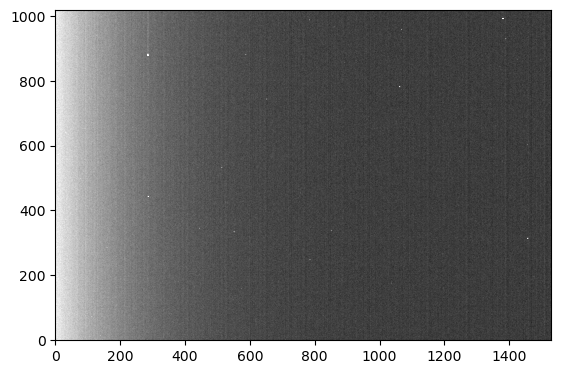

In [56]:
master_bias = np.median(bias, axis=0)
imshow_norm(master_bias, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [252]:
bias2 = np.zeros((len(files_bias2), ccd_shape[0], ccd_shape[1]))
for file in range(len(files_bias2)):
    bias2[file] = fits.getdata(files_bias2[file])

(<matplotlib.image.AxesImage at 0x7f8d94d5fd90>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94e17070>)

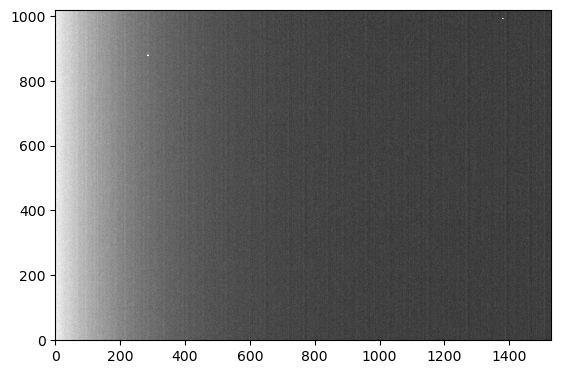

In [253]:
master_bias2 = np.median(bias2, axis=0)
imshow_norm(master_bias2, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

### Dark

#### Other Group

In [259]:
files_dark_07 = glob(files_dark[2]+'/*')
files_dark_15 = glob(files_dark[0]+'/*')
files_dark_30 = glob(files_dark[3]+'/*')
files_dark_40 = glob(files_dark[1]+'/*')

In [48]:
dark_07 = np.zeros((len(files_dark_07), ccd_shape[0], ccd_shape[1]))
exptime_dark_07 = fits.getheader(files_dark_07[0])['EXPTIME']
for file in range(len(files_dark_07)):
    dark_07[file] = fits.getdata(files_dark_07[file])

(<matplotlib.image.AxesImage at 0x7f8d945a55e0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94741ca0>)

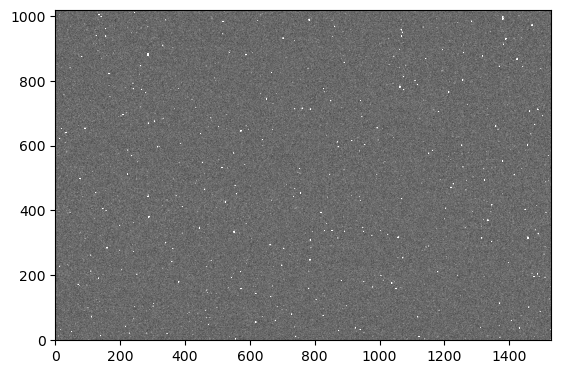

In [60]:
master_dark_07 = np.median(dark_07-master_bias, axis=0)
imshow_norm(master_dark_07, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [49]:
dark_15 = np.zeros((len(files_dark_15), ccd_shape[0], ccd_shape[1]))
exptime_dark_15 = fits.getheader(files_dark_15[0])['EXPTIME']
for file in range(len(files_dark_15)):
    dark_15[file] = fits.getdata(files_dark_15[file])

(<matplotlib.image.AxesImage at 0x7f8d9452a0d0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d949a5430>)

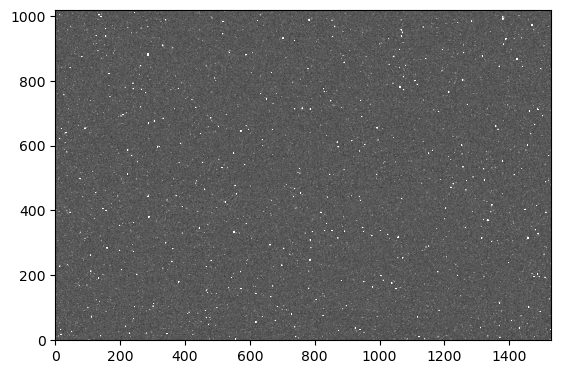

In [61]:
master_dark_15 = np.median(dark_15-master_bias, axis=0)
imshow_norm(master_dark_15, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [50]:
dark_30 = np.zeros((len(files_dark_30), ccd_shape[0], ccd_shape[1]))
exptime_dark_30 = fits.getheader(files_dark_30[0])['EXPTIME']
for file in range(len(files_dark_30)):
    dark_30[file] = fits.getdata(files_dark_30[file])

(<matplotlib.image.AxesImage at 0x7f8d9447b250>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94763f70>)

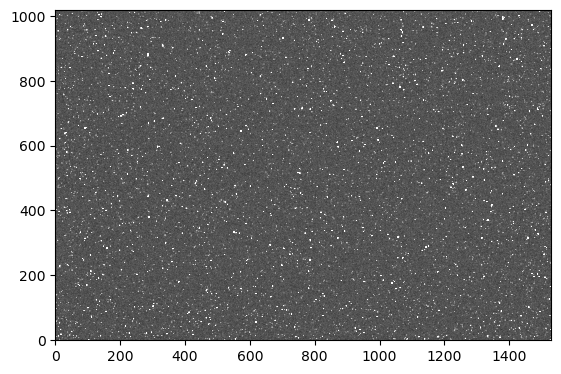

In [62]:
master_dark_30 = np.median(dark_30-master_bias, axis=0)
imshow_norm(master_dark_30, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [51]:
dark_40 = np.zeros((len(files_dark_40), ccd_shape[0], ccd_shape[1]))
exptime_dark_40 = fits.getheader(files_dark_40[0])['EXPTIME']
for file in range(len(files_dark_40)):
    dark_40[file] = fits.getdata(files_dark_40[file])

(<matplotlib.image.AxesImage at 0x7f8d9c0a94f0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d945dc940>)

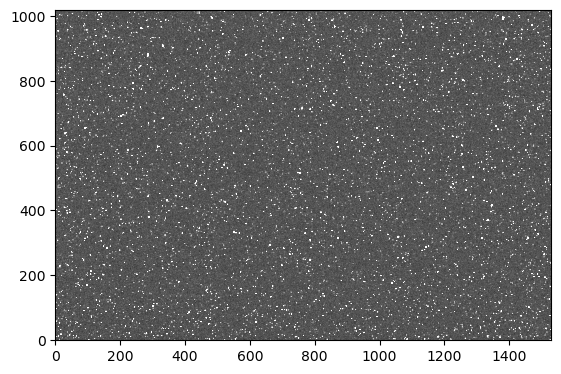

In [63]:
master_dark_40 = np.median(dark_40-master_bias, axis=0)
imshow_norm(master_dark_40, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

#### My Group

In [260]:
files_dark2_10 = glob(files_dark2[3]+'/*')
files_dark2_20 = glob(files_dark2[4]+'/*')
files_dark2_40 = glob(files_dark2[1]+'/*')
files_dark2_50 = glob(files_dark2[0]+'/*')
files_dark2_60 = glob(files_dark2[2]+'/*')

In [261]:
dark2_10 = np.zeros((len(files_dark2_10), ccd_shape[0], ccd_shape[1]))
exptime_dark2_10 = fits.getheader(files_dark2_10[0])['EXPTIME']
for file in range(len(files_dark2_10)):
    dark2_10[file] = fits.getdata(files_dark2_10[file])

(<matplotlib.image.AxesImage at 0x7f8d94d51070>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94d9e9a0>)

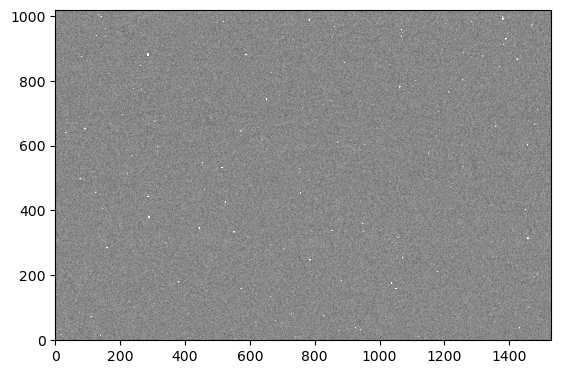

In [262]:
master_dark2_10 = np.median(dark2_10-master_bias2, axis=0)
imshow_norm(master_dark2_10, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [263]:
dark2_20 = np.zeros((len(files_dark2_20), ccd_shape[0], ccd_shape[1]))
exptime_dark2_20 = fits.getheader(files_dark2_20[0])['EXPTIME']
for file in range(len(files_dark2_20)):
    dark2_20[file] = fits.getdata(files_dark2_20[file])

(<matplotlib.image.AxesImage at 0x7f8d94cb4280>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94ce9820>)

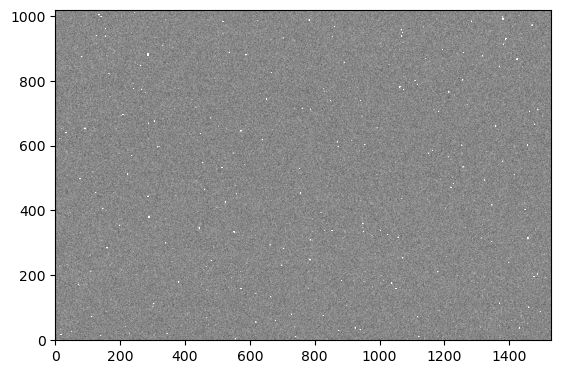

In [264]:
master_dark2_20 = np.median(dark2_20-master_bias2, axis=0)
imshow_norm(master_dark2_20, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [265]:
dark2_40 = np.zeros((len(files_dark2_40), ccd_shape[0], ccd_shape[1]))
exptime_dark2_40 = fits.getheader(files_dark2_40[0])['EXPTIME']
for file in range(len(files_dark2_40)):
    dark2_40[file] = fits.getdata(files_dark2_40[file])

(<matplotlib.image.AxesImage at 0x7f8d94c98400>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94d8ef10>)

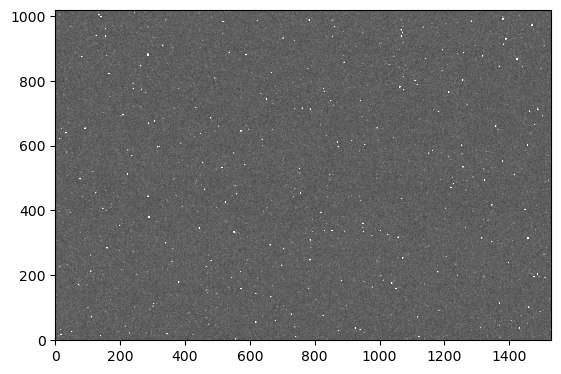

In [266]:
master_dark2_40 = np.median(dark2_40-master_bias2, axis=0)
imshow_norm(master_dark2_40, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [267]:
dark2_50 = np.zeros((len(files_dark2_50), ccd_shape[0], ccd_shape[1]))
exptime_dark2_50 = fits.getheader(files_dark2_50[0])['EXPTIME']
for file in range(len(files_dark2_50)):
    dark2_50[file] = fits.getdata(files_dark2_50[file])

(<matplotlib.image.AxesImage at 0x7f8d94bfc4c0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94e17b80>)

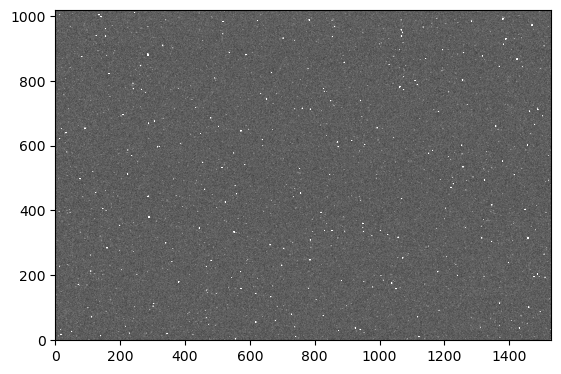

In [268]:
master_dark2_50 = np.median(dark2_50-master_bias2, axis=0)
imshow_norm(master_dark2_50, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [269]:
dark2_60 = np.zeros((len(files_dark2_60), ccd_shape[0], ccd_shape[1]))
exptime_dark2_60 = fits.getheader(files_dark2_60[0])['EXPTIME']
for file in range(len(files_dark2_60)):
    dark2_60[file] = fits.getdata(files_dark2_60[file])

(<matplotlib.image.AxesImage at 0x7f8d94b60760>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94ccd280>)

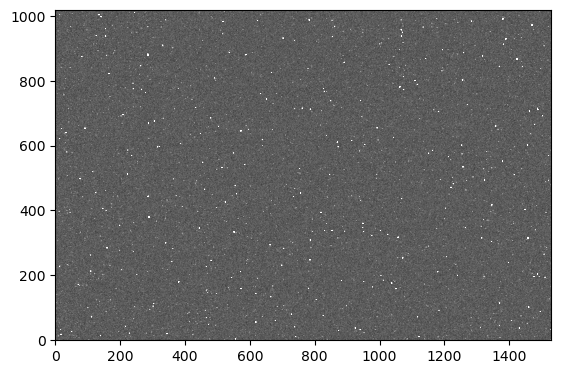

In [270]:
master_dark2_60 = np.median(dark2_60-master_bias2, axis=0)
imshow_norm(master_dark2_60, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

### Flat

#### Other Group

In [93]:
flat = np.zeros((len(files_flat), ccd_shape[0], ccd_shape[1]))
exptime_flat = fits.getheader(files_flat[0])['EXPTIME']
for file in range(len(files_flat)):
    flat[file] = fits.getdata(files_flat[file])

(<matplotlib.image.AxesImage at 0x7f8d97a8fc40>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d97b14220>)

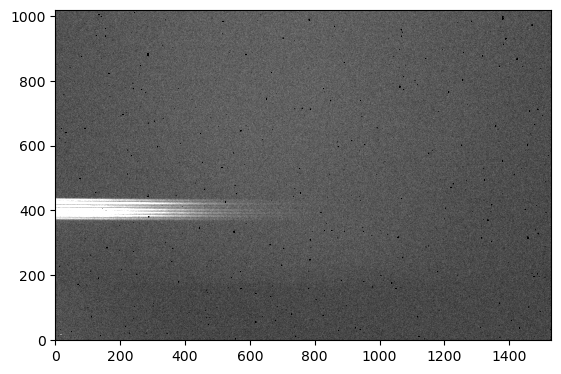

In [94]:
master_flat = np.median(flat-master_bias-(exptime_flat/exptime_dark_07)*master_dark_07, axis=0)
imshow_norm(master_flat, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [95]:
np.mean(master_flat)

22.085019131835743

In [96]:
master_norm_flat = master_flat / np.mean(master_flat)
np.mean(master_norm_flat)

0.9999999999999992

#### My Group

In [271]:
flat2 = np.zeros((len(files_flat2), ccd_shape[0], ccd_shape[1]))
exptime_flat2 = fits.getheader(files_flat2[0])['EXPTIME']
for file in range(len(files_flat2)):
    flat2[file] = fits.getdata(files_flat2[file])

(<matplotlib.image.AxesImage at 0x7f8d94b48640>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94c0aa90>)

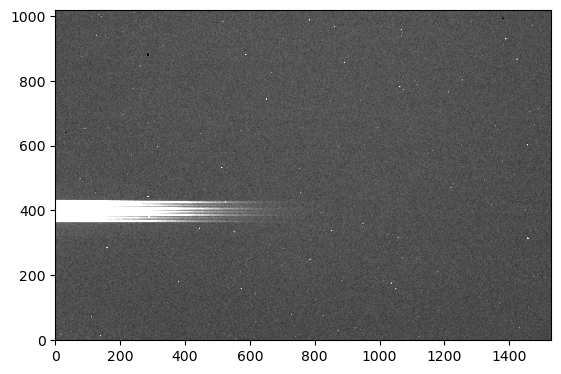

In [272]:
master_flat2 = np.median(flat2-master_bias2-(exptime_flat2/exptime_dark2_10)*master_dark2_10, axis=0)
imshow_norm(master_flat2, origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

In [273]:
master_norm_flat2 = master_flat2 / np.mean(master_flat2)
np.mean(master_norm_flat2)

1.0000000000000004

### Wavelength Calibration

$[master\_flat-\frac{exptime\_flat}{exptime\_dark}(master\_dark)]_{ave}[\frac{(object-master\_bias)
-\frac{exptime\_obj}{exptime\_dark}(master\_dark)}{(master\_flat)-\frac{exptime\_flat}{exptime\_dark}(master\_dark)}]_{pix}$

$[(flat-bias)-\frac{t_f}{t_d}(dark-bias)]_{ave}[\frac{(object-bias)-\frac{t_o}{t_d}(dark-bias)}{(flat-bias)-\frac{t_f}{t_d}(dark-bias)}]_{pix}$

In [208]:
def lin_fit(x, m, b):
    return m*x+b
def quad_fit(x, a, b, c):
    return a*x**2 + b*x + c
def gauss_fit(x, a, x0, sigma):
    return a*np.exp(-1*(x-x0)**2/(2*sigma**2))

#### Other Group

In [97]:
files_cali

['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/calibration/cal_Hg_7s.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/calibration/cal_neon_10s.FIT']

In [98]:
cali_Hg = fits.getdata(files_cali[0])

In [108]:
exptime_Hg = fits.getheader(files_cali[0])['EXPTIME']

final_Hg = (cali_Hg - master_bias - (exptime_Hg/exptime_dark_07)*master_dark_07)/(master_norm_flat)

/tmp/ipykernel_5285/1387433607.py:3: RuntimeWarning: divide by zero encountered in true_divide
  final_Hg = (cali_Hg - master_bias - (exptime_Hg/exptime_dark_07)*master_dark_07)/(master_norm_flat)
/tmp/ipykernel_5285/1387433607.py:3: RuntimeWarning: invalid value encountered in true_divide
  final_Hg = (cali_Hg - master_bias - (exptime_Hg/exptime_dark_07)*master_dark_07)/(master_norm_flat)


(<matplotlib.image.AxesImage at 0x7f8d975bd4c0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d97583c70>)

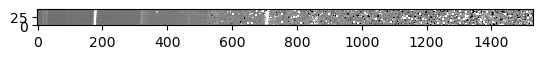

In [119]:
imshow_norm(final_Hg[375:425,:], origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

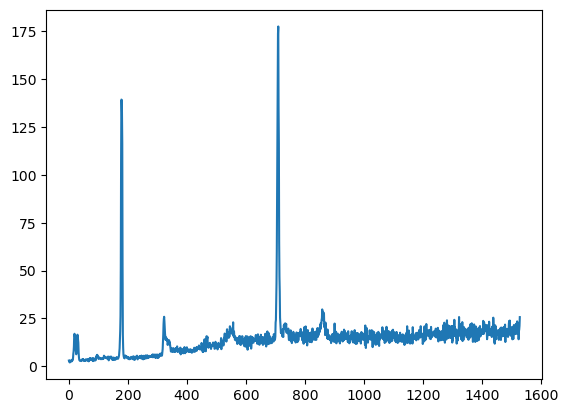

In [245]:
em_Hg = np.nanmedian(final_Hg[375:425,:], axis=0)
px_Hg = np.arange(len(em_Hg))
em_Hg[em_Hg==np.nan] = 0
plt.plot(em_Hg)
# 435.835 nm (blue), 546.074 nm (green)

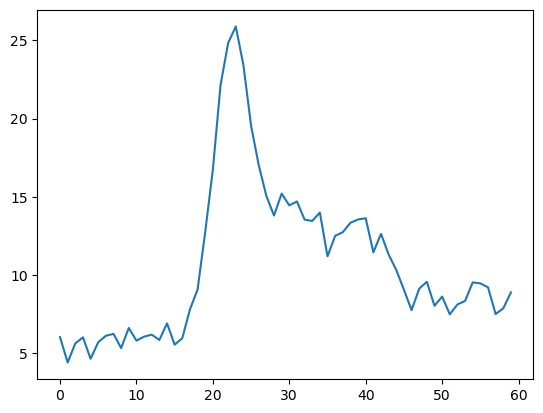

In [232]:
#plt.plot(em_Hg[0:26])
#plt.plot(em_Hg[26:50])
#plt.plot(em_Hg[160:200])
plt.plot(em_Hg[300:360])
#plt.plot(em_Hg[500:600])
#plt.plot(em_Hg[690:730])
#plt.plot(em_Hg[825:900])


In [110]:
cali_Ne = fits.getdata(files_cali[1])

In [113]:
exptime_Ne = fits.getheader(files_cali[1])['EXPTIME']

final_Ne = (cali_Ne - master_bias - (exptime_Ne/exptime_dark_07)*master_dark_07)/(master_norm_flat)

/tmp/ipykernel_5285/1325804219.py:3: RuntimeWarning: divide by zero encountered in true_divide
  final_Ne = (cali_Ne - master_bias - (exptime_Ne/exptime_dark_07)*master_dark_07)/(master_norm_flat)
/tmp/ipykernel_5285/1325804219.py:3: RuntimeWarning: invalid value encountered in true_divide
  final_Ne = (cali_Ne - master_bias - (exptime_Ne/exptime_dark_07)*master_dark_07)/(master_norm_flat)


(<matplotlib.image.AxesImage at 0x7f8d97676460>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d976cf850>)

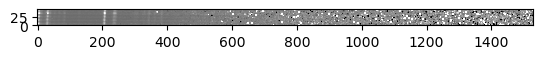

In [117]:
imshow_norm(final_Ne[375:425,:], origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')


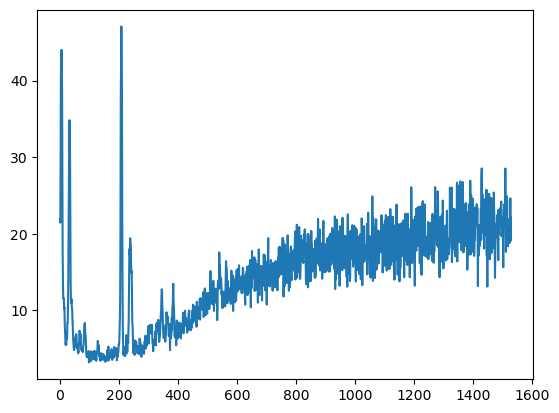

In [217]:
em_Ne = np.nanmedian(final_Ne[375:425,:], axis=0)
plt.plot(em_Ne)

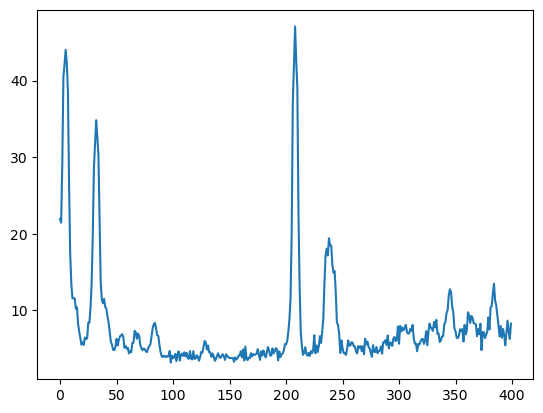

In [246]:
plt.plot(em_Ne[:400])
#plt.plot(em_Ne[0:20])
#plt.plot(em_Ne[20:50])
#plt.plot(em_Ne[190:230])
#plt.plot(em_Ne[230:250])
#plt.plot(em_Ne[330:355])
#plt.plot(em_Ne[355:400])

#### My Group

In [274]:
files_cali2

['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/calibration/Hydrogen_10s.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/calibration/Mercury_20s.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/mygroup/calibration/Neon_10s.FIT']

In [275]:
cali2_H  = fits.getdata(files_cali2[0])
cali2_Hg = fits.getdata(files_cali2[1])
cali2_Ne = fits.getdata(files_cali2[2])

In [289]:
exptime2_Hg = fits.getheader(files_cali2[1])['EXPTIME']
final2_Hg = (cali2_Hg - master_bias2 - (exptime2_Hg/exptime_dark2_20)*master_dark2_20)/(master_norm_flat2)

/tmp/ipykernel_5285/786135649.py:2: RuntimeWarning: divide by zero encountered in true_divide
  final2_Hg = (cali2_Hg - master_bias2 - (exptime2_Hg/exptime_dark2_20)*master_dark2_20)/(master_norm_flat2)
/tmp/ipykernel_5285/786135649.py:2: RuntimeWarning: invalid value encountered in true_divide
  final2_Hg = (cali2_Hg - master_bias2 - (exptime2_Hg/exptime_dark2_20)*master_dark2_20)/(master_norm_flat2)


(<matplotlib.image.AxesImage at 0x7f8d95868f10>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d9584d1f0>)

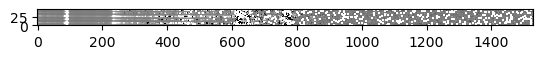

In [290]:
imshow_norm(final2_Hg[375:425,:], origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

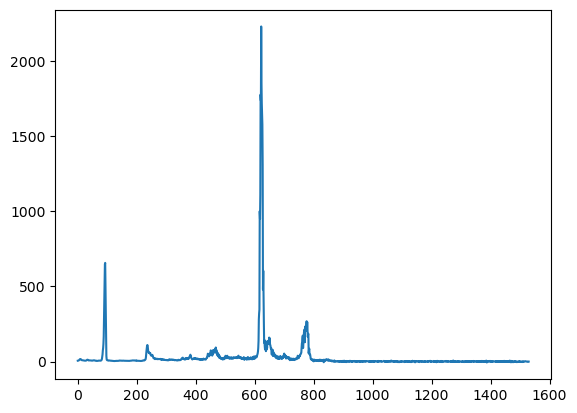

In [291]:
em2_Hg = np.nanmedian(final2_Hg[375:425,:], axis=0)
px2_Hg = np.arange(len(em2_Hg))
plt.plot(em2_Hg)

In [292]:
exptime2_H = fits.getheader(files_cali2[0])['EXPTIME']
final2_H = (cali2_H - master_bias2 - (exptime2_H/exptime_dark2_10)*master_dark2_10)/(master_norm_flat2)

/tmp/ipykernel_5285/2111062723.py:2: RuntimeWarning: divide by zero encountered in true_divide
  final2_H = (cali2_H - master_bias2 - (exptime2_H/exptime_dark2_10)*master_dark2_10)/(master_norm_flat2)
/tmp/ipykernel_5285/2111062723.py:2: RuntimeWarning: invalid value encountered in true_divide
  final2_H = (cali2_H - master_bias2 - (exptime2_H/exptime_dark2_10)*master_dark2_10)/(master_norm_flat2)


(<matplotlib.image.AxesImage at 0x7f8d9430ffd0>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d9434ec10>)

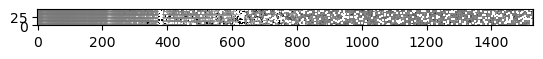

In [293]:
imshow_norm(final2_H[375:425,:], origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

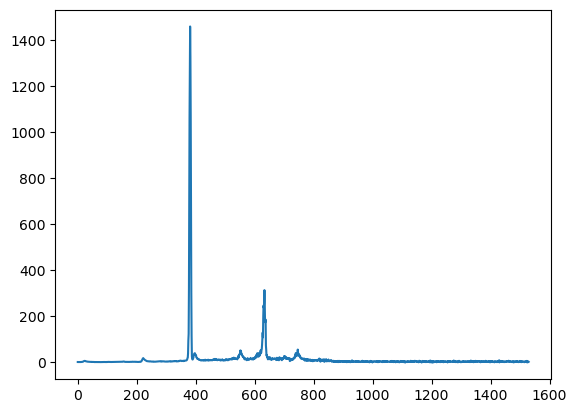

In [294]:
em2_H = np.nanmedian(final2_H[375:425,:], axis=0)
px2_H = np.arange(len(em2_H))
plt.plot(em2_H)

In [295]:
exptime2_Ne = fits.getheader(files_cali2[1])['EXPTIME']
final2_Ne = (cali2_Ne - master_bias2 - (exptime2_Ne/exptime_dark2_10)*master_dark2_10)/(master_norm_flat2)

/tmp/ipykernel_5285/300449279.py:2: RuntimeWarning: divide by zero encountered in true_divide
  final2_Ne = (cali2_Ne - master_bias2 - (exptime2_Ne/exptime_dark2_10)*master_dark2_10)/(master_norm_flat2)
/tmp/ipykernel_5285/300449279.py:2: RuntimeWarning: invalid value encountered in true_divide
  final2_Ne = (cali2_Ne - master_bias2 - (exptime2_Ne/exptime_dark2_10)*master_dark2_10)/(master_norm_flat2)


(<matplotlib.image.AxesImage at 0x7f8d941e9250>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7f8d94294b80>)

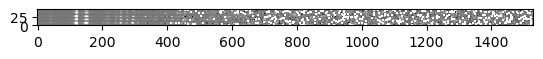

In [296]:
imshow_norm(final2_Ne[375:425,:], origin='lower', interval=ZScaleInterval(), stretch=viz.LinearStretch(), cmap='gray')

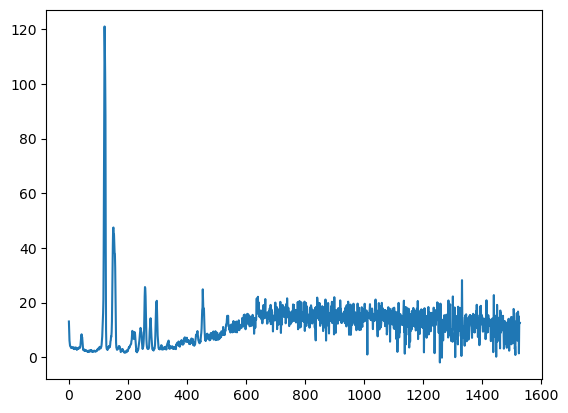

In [297]:
em2_Ne = np.nanmedian(final2_Ne[375:425,:], axis=0)
px2_Ne = np.arange(len(em2_Ne))
plt.plot(em2_Ne)

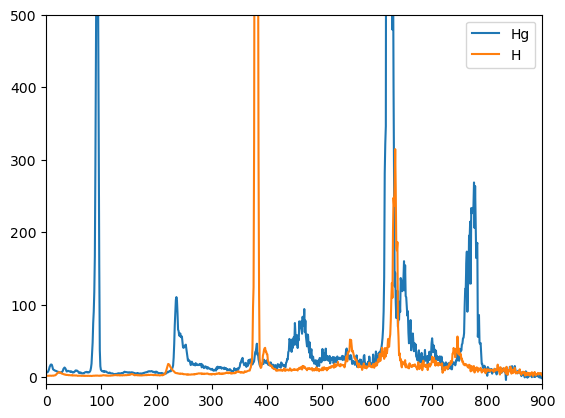

In [309]:
#plt.plot(em2_Hg, label='Hg')
#plt.plot(em2_Ne, label='Ne')
plt.plot(em2_Hg, label='Hg')
#plt.plot(em2_Ne, label='Ne')
plt.plot(em2_H, label='H')
plt.ylim(top=500, bottom=-10)
plt.xlim(left=0, right=900)
plt.legend()

In [347]:
px_H_633 = 434.047#*u.nm # blue
px_H_382 = 486.133#*u.nm # teal
px_Hg_622 = 435.835#*u.nm # blue
px_Hg_93  = 546.074 #*u.nm # green
px_Ne_121 = 540.05616# *u.nm
px_Ne_151 = 534.10938 #*u.nm

#plt.plot(em2_H[:])
#plt.plot(em2_Hg[:])
#plt.plot(em2_Ne[:])
#plt.ylim(top=200, bottom=-5)

#np.argmax(em2_Ne[140:190])

# The prominent mercury lines are at 435.835 nm (blue), 546.074 nm (green), 
# and a pair at 576.959 nm and 579.065 nm (yellow-orange). There are two other 
# blue lines at 404.656 nm and 407.781 nm and a weak line at 491.604 nm

In [351]:
x = [633, 382, 622, 93, 121, 151]
wave = [px_H_633, px_H_382, px_Hg_622, px_Hg_93, px_Ne_121, px_Ne_151]
fit = curve_fit(lin_fit, x, wave)[0]


In [353]:
px = np.arange(len(em2_Hg))
wavelengths = lin_fit(px, fit[0], fit[1])

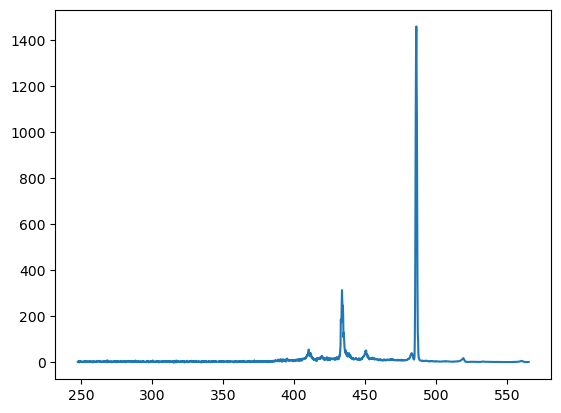

In [354]:
plt.plot(wavelengths, em2_H)

### Science

In [38]:
files_albr


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_2.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_3.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_4.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberioa_40s_5.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/alberio/alberiob_40s_1.FIT']

In [39]:
files_denb


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/deneb/deneb_40s_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/deneb/deneb_40s_2.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/deneb/deneb_40s_3.FIT']

In [40]:
files_epsP


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/epsPeg/eps_Peg_40s.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/epsPeg/eps_Peg_40s_2.FIT']

In [41]:
files_euro


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/europa/europa_40s_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/europa/europa_40s_2.FIT']

In [42]:
files_jupi


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/Jupiter_30s_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/Jupiter_30s_2.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/Jupiter_30s_3.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/jupiter_30s_4.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/jupiter/jupiter_30s_5.FIT']

In [43]:
files_sunn


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/sun/sun_20s001.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/sun/sun_20s002.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/sun/sun_20s003.FIT']

In [44]:
files_vega


['/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/vega/vega_1.FIT',
 '/mnt/c/Users/panda/Documents/ObsAstronomy/ObsData/LabSixData/othergroup/vega/vega_2.FIT']